In [27]:
import os
print(os.getcwd())



/drive/notebooks/ZEOTAP


In [6]:
import pandas as pd
import numpy as np


In [7]:
customers = pd.read_csv('/drive/notebooks/ZEOTAP/Customers.csv')
products = pd.read_csv('/drive/notebooks/ZEOTAP/Products.csv')
transactions = pd.read_csv('/drive/notebooks/ZEOTAP/Transactions.csv')


In [30]:
# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

# Summary of the datasets
print(customers.describe())
print(products.describe())
print(transactions.describe())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [31]:
#Check for missing values:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [32]:
#Data Cleaning (if needed): Handle missing values or duplicates:
customers = customers.dropna()  # or use fillna() for imputation
products = products.dropna()
transactions = transactions.dropna()


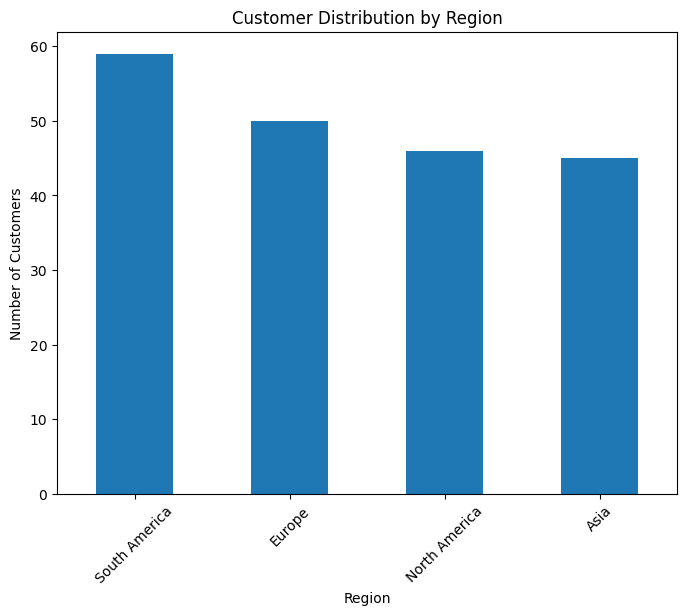

In [35]:
import matplotlib.pyplot as plt

# Count the number of customers in each region
region_counts = customers['Region'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8,6))
region_counts.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

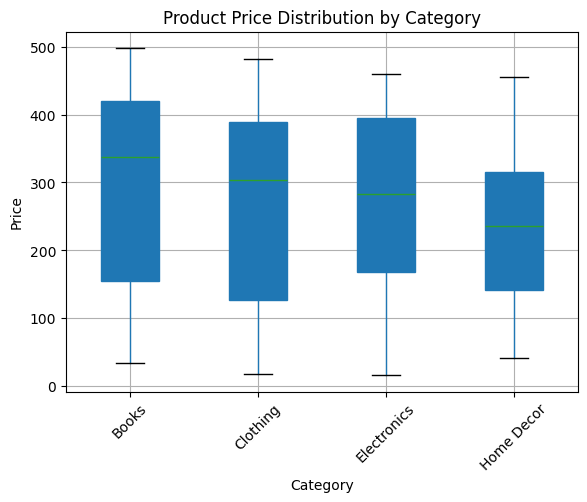

In [8]:
import matplotlib.pyplot as plt

# Create a boxplot of product prices by category
plt.figure(figsize=(10, 6))
products.boxplot(column='Price', by='Category', patch_artist=True)
plt.title('Product Price Distribution by Category')
plt.suptitle('')  # This removes the default title generated by 'by'
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


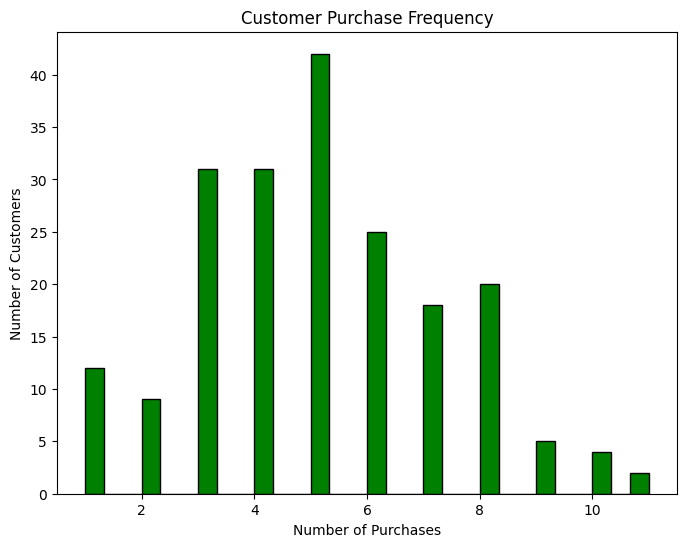

In [40]:
# Count the number of purchases for each customer
customer_purchase_count = transactions.groupby('CustomerID').size()

# Plot the frequency of customer purchases
plt.figure(figsize=(8,6))
customer_purchase_count.plot(kind='hist', bins=30, color='g', edgecolor='black')
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


In [45]:
# Check the columns of merged_data
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y'],
      dtype='object')


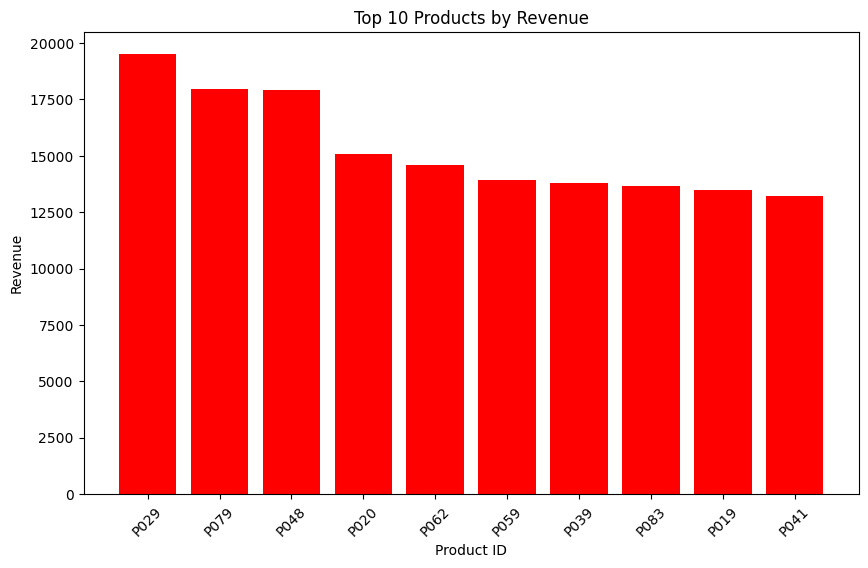

In [48]:
# Calculate the revenue per product by summing the TotalValue column
product_revenue = merged_data.groupby('ProductID').agg({'TotalValue': 'sum'}).reset_index()

# Sort the products by total revenue in descending order and take the top 10
top_10_products = product_revenue.sort_values(by='TotalValue', ascending=False).head(10)

# Plot the top 10 products by revenue
plt.figure(figsize=(10,6))
plt.bar(top_10_products['ProductID'].astype(str), top_10_products['TotalValue'], color='r')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

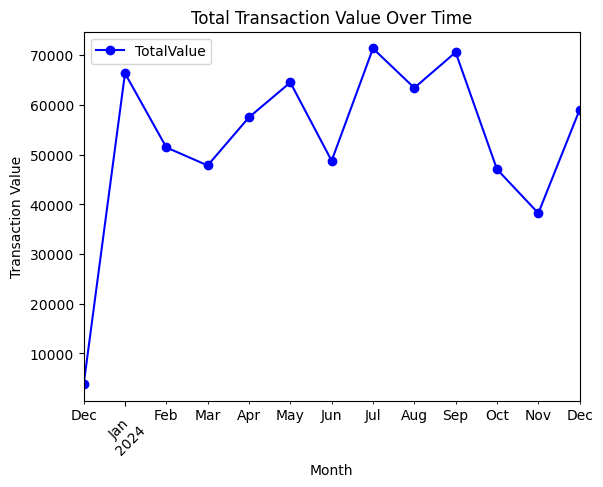

In [49]:
# Convert 'TransactionDate' to datetime format (if not already)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Group by month and sum the TotalValue
monthly_transactions = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).agg({'TotalValue': 'sum'})

# Plot the total transaction value per month
plt.figure(figsize=(10,6))
monthly_transactions.plot(kind='line', marker='o', color='b')
plt.title('Total Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Transaction Value')
plt.xticks(rotation=45)
plt.show()
